In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\madel\Documents\Maestría Ciencia de Datos\SEMESTRE_2\Topicos selectos de grandes bases de datos I\TSGBD_I\Datasets\Wholesale.csv")
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [6]:
columns_to_drop = ['Channel','Region']
data_cluster = data.drop(columns=columns_to_drop)
data_cluster.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

In [7]:
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [8]:
data_cluster.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

array([[<Axes: title={'center': 'Fresh'}>,
        <Axes: title={'center': 'Milk'}>],
       [<Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>]], dtype=object)

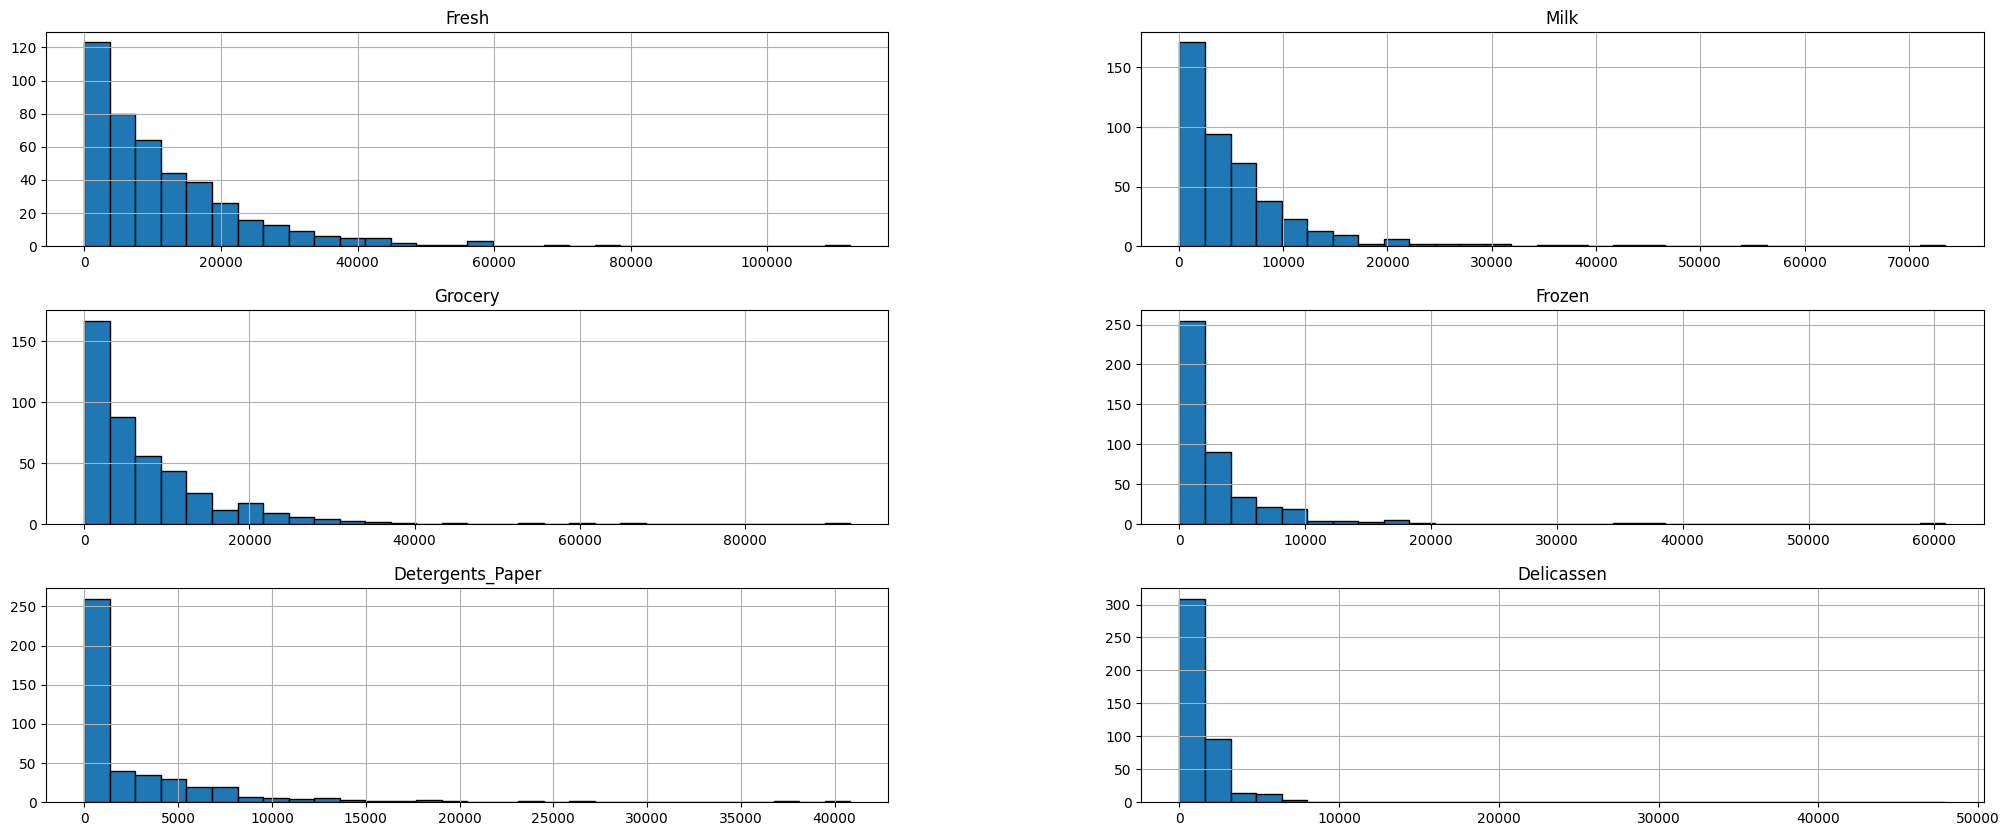

In [9]:
data_cluster.hist(figsize=(25,10), bins=30, edgecolor='black')

In [10]:
data_cluster.describe()

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

In [11]:
from sklearn.preprocessing import normalize

data_scaled = normalize(data_cluster)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

0         1         2         3         4         5
0  0.708333  0.539874  0.422741  0.011965  0.149505  0.074809
1  0.442198  0.614704  0.599540  0.110409  0.206342  0.111286
2  0.396552  0.549792  0.479632  0.150119  0.219467  0.489619
3  0.856837  0.077254  0.272650  0.413659  0.032749  0.115494
4  0.895416  0.214203  0.284997  0.155010  0.070358  0.205294

In [12]:
data_scaled.describe()

0           1           2           3           4           5
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000
mean     0.608111    0.306342    0.414267    0.185777    0.137032    0.087564
std      0.339614    0.216936    0.267369    0.200710    0.149245    0.089597
min      0.000175    0.005848    0.000143    0.000644    0.000143    0.000077
25%      0.285100    0.123490    0.164689    0.045811    0.020551    0.030020
50%      0.722229    0.251437    0.375277    0.112828    0.062453    0.062284
75%      0.927366    0.455574    0.654840    0.243927    0.242912    0.117928
max      0.999391    0.926102    0.976789    0.944218    0.903593    0.642610

In [13]:
from sklearn.decomposition import PCA
pca =PCA()
data_scaled = pca.fit_transform(data_scaled)

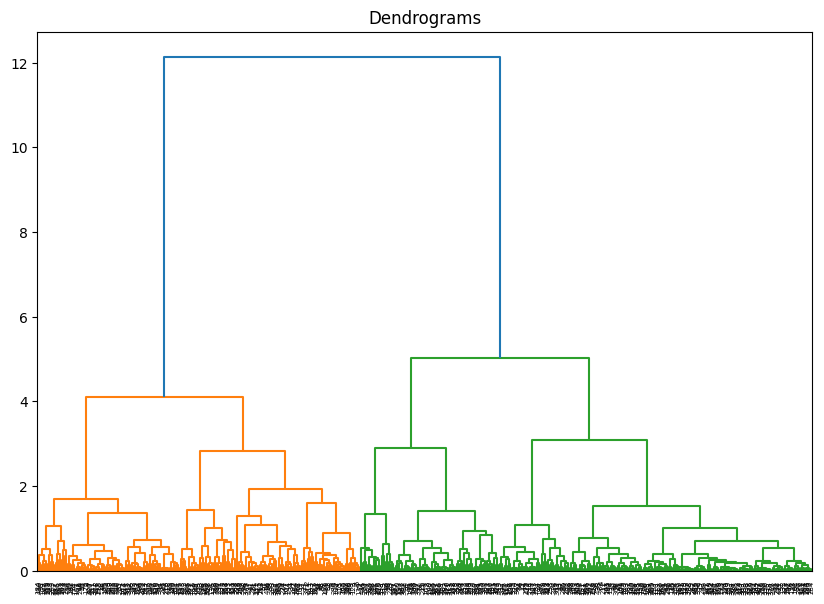

In [16]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

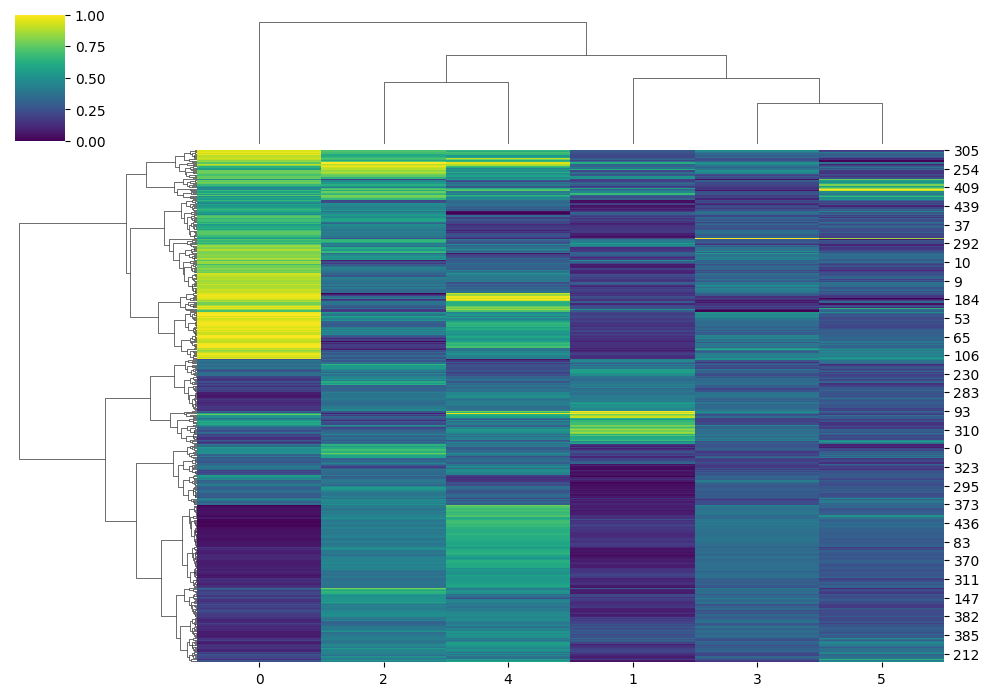

In [17]:
import seaborn as sns

sns.clustermap(data_scaled, method='ward', cmap='viridis', standard_scale=1, figsize=(10,7))
plt.show()

In [18]:
from scipy.cluster.hierarchy import fcluster

Z= shc.linkage(data_scaled, method='ward')

n_clusters=2
clusters=fcluster(Z, n_clusters, criterion='maxclust')

In [19]:
cluster = pd.DataFrame(clusters, columns=['Cluster'])
cluster

Cluster
0          1
1          1
2          1
3          2
4          2
..       ...
435        2
436        2
437        1
438        2
439        1

[440 rows x 1 columns]

In [20]:
data['Cluster'] = cluster['Cluster'].values
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        1  
1        1776        1  
2        7844        1  
3        1788        2  
4        5185        2

In [21]:
data.to_csv("datos_cluster.csv", index=False)